In [45]:
import numpy as np
 
QUADRATURE_SAMPLES = 10

# Domain of the function to be integrated
a = -1.0
b = 1.0

# The function we want to evalue : f(x) defined in the domain [a,b]
# /!\ Do not evaluate the function beyond the defined domain. It should just return 0 if not in [a,b]
def f(x):
    return np.sqrt(1.0 - x**2)

In [52]:
xis = np.linspace(a, b, QUADRATURE_SAMPLES,endpoint=False)
quadrature_weight = (b - a) / QUADRATURE_SAMPLES

# Computing the integral estimate
integral_estimate = 0
for x_i in xis:
    integral_estimate += quadrature_weight * f(x_i)

error = abs(integral_estimate - (np.pi*0.5))/ ((np.pi*0.5)) * 100.0
print(f"The integral estimate is {integral_estimate} ( {error} % error)")

The integral estimate is 1.5185244144417758 ( 3.327733294346192 % error)


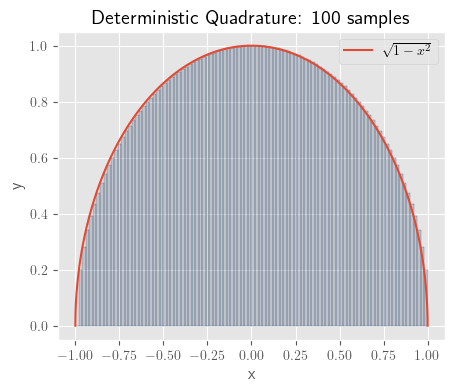

In [41]:
############ Visualisation ###############
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    # "font.sans-serif": "Helvetica",
})
red = (97/255.0,46/255.0,43/255.0)
green = (0,73/255.0,22/255.0)
blue =  (38/255.0,61/255.0,100/255.0)

plt.style.use('ggplot')

# Plot the original function
xs = np.linspace(a, b, 10000)
ys = f(xs)
fig, ax = plt.subplots(figsize=(5,4))
ax.plot(xs, ys, label = r"$\sqrt{1 - x^2}$")

quadrature_weight = (b - a) / QUADRATURE_SAMPLES
# Plot the rectangles rectangles for the quadrature
xis = np.linspace(a, b, QUADRATURE_SAMPLES,endpoint=False)
for xi in xis:
    rect_width = quadrature_weight
    rect_height = f(xi)
    rectangle = plt.Rectangle((xi, 0), rect_width, rect_height,linewidth= 25.0 / max(15,QUADRATURE_SAMPLES), edgecolor=(*blue,0.8), facecolor=(*blue,0.2))
    ax.add_patch(rectangle)

# Set plot labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title(f'Deterministic Quadrature: {QUADRATURE_SAMPLES} samples')

# Show the plot
ax.legend()
# fig.savefig(f"deterministic_quadrature_{QUADRATURE_SAMPLES}.pdf", transparent=True)